In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

/home/shruti/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.12.0


In [2]:
num_words=10000
(train_data,train_labels),(test_data,test_labels)=keras.datasets.imdb.load_data(num_words=num_words)

def multi_hot_sequence(sequence,dimension):
    results=np.zeros((len(sequence),dimension))
    for i ,word_indices in enumerate(sequence):
        results[i,word_indices]=1.0
    return results

train_data=multi_hot_sequence(train_data,dimension=num_words)
test_data=multi_hot_sequence(test_data,dimension=num_words)
test_data

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

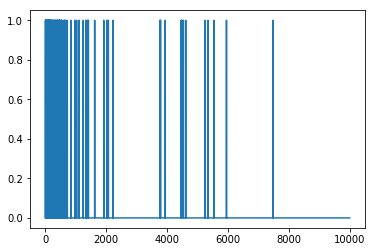

In [3]:
plt.plot(train_data[0])

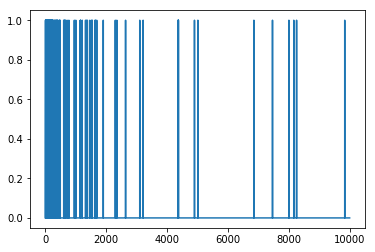

In [4]:
plt.plot(train_data[1])

In [6]:
baseline_model=keras.Sequential([keras.layers.Dense(16,activation=tf.nn.relu,input_shape=(num_words,)),
                                 keras.layers.Dense(16,activation=tf.nn.relu),
                                 keras.layers.Dense(1,activation=tf.nn.sigmoid)])

baseline_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

baseline_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history=baseline_model.fit(train_data,train_labels,epochs=20,batch_size=512,
                                    validation_data=(test_data,test_labels),verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5473 - acc: 0.7746 - binary_crossentropy: 0.5473 - val_loss: 0.3900 - val_acc: 0.8662 - val_binary_crossentropy: 0.3900
Epoch 2/20
 - 1s - loss: 0.2883 - acc: 0.9032 - binary_crossentropy: 0.2883 - val_loss: 0.2932 - val_acc: 0.8865 - val_binary_crossentropy: 0.2932
Epoch 3/20
 - 1s - loss: 0.2053 - acc: 0.9291 - binary_crossentropy: 0.2053 - val_loss: 0.2836 - val_acc: 0.8874 - val_binary_crossentropy: 0.2836
Epoch 4/20
 - 1s - loss: 0.1636 - acc: 0.9440 - binary_crossentropy: 0.1636 - val_loss: 0.2972 - val_acc: 0.8814 - val_binary_crossentropy: 0.2972
Epoch 5/20
 - 1s - loss: 0.1359 - acc: 0.9542 - binary_crossentropy: 0.1359 - val_loss: 0.3214 - val_acc: 0.8774 - val_binary_crossentropy: 0.3214
Epoch 6/20
 - 1s - loss: 0.1135 - acc: 0.9642 - binary_crossentropy: 0.1135 - val_loss: 0.3427 - val_acc: 0.8750 - val_binary_crossentropy: 0.3427
Epoch 7/20
 - 1s - loss: 0.0942 - acc: 0.9714 - binary_crossentropy:

In [8]:
#Create Smaller model
small_model=keras.Sequential([keras.layers.Dense(4,activation=tf.nn.relu,input_shape=(num_words,)),
                             keras.layers.Dense(4,activation=tf.nn.relu),
                              keras.layers.Dense(1,activation=tf.nn.sigmoid)])

small_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

small_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
small_history=small_model.fit(train_data,train_labels,epochs=20,batch_size=512,
                              validation_data=(test_data,test_labels),
                             verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 2s - loss: 0.6063 - acc: 0.7044 - binary_crossentropy: 0.6063 - val_loss: 0.4823 - val_acc: 0.8370 - val_binary_crossentropy: 0.4823
Epoch 2/20
 - 1s - loss: 0.3570 - acc: 0.8850 - binary_crossentropy: 0.3570 - val_loss: 0.3261 - val_acc: 0.8799 - val_binary_crossentropy: 0.3261
Epoch 3/20
 - 1s - loss: 0.2443 - acc: 0.9198 - binary_crossentropy: 0.2443 - val_loss: 0.2885 - val_acc: 0.8880 - val_binary_crossentropy: 0.2885
Epoch 4/20
 - 1s - loss: 0.1952 - acc: 0.9350 - binary_crossentropy: 0.1952 - val_loss: 0.2833 - val_acc: 0.8872 - val_binary_crossentropy: 0.2833
Epoch 5/20
 - 1s - loss: 0.1642 - acc: 0.9465 - binary_crossentropy: 0.1642 - val_loss: 0.2903 - val_acc: 0.8833 - val_binary_crossentropy: 0.2903
Epoch 6/20
 - 1s - loss: 0.1406 - acc: 0.9550 - binary_crossentropy: 0.1406 - val_loss: 0.3002 - val_acc: 0.8824 - val_binary_crossentropy: 0.3002
Epoch 7/20
 - 1s - loss: 0.1209 - acc: 0.9638 - binary_crossentropy:

In [11]:
#Create bigger model
bigger_model=keras.models.Sequential([keras.layers.Dense(512,activation=tf.nn.relu,input_shape=(num_words,)),
            keras.layers.Dense(512,activation=tf.nn.relu),
            keras.layers.Dense(1,activation=tf.nn.sigmoid)])

bigger_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history=bigger_model.fit(train_data,train_labels,epochs=20,batch_size=512,
                                validation_data=(test_data,test_labels),verbose=2)


Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.3447 - acc: 0.8547 - binary_crossentropy: 0.3447 - val_loss: 0.2922 - val_acc: 0.8800 - val_binary_crossentropy: 0.2922
Epoch 2/20
 - 9s - loss: 0.1336 - acc: 0.9509 - binary_crossentropy: 0.1336 - val_loss: 0.3604 - val_acc: 0.8618 - val_binary_crossentropy: 0.3604
Epoch 3/20
 - 9s - loss: 0.0412 - acc: 0.9887 - binary_crossentropy: 0.0412 - val_loss: 0.4368 - val_acc: 0.8703 - val_binary_crossentropy: 0.4368
Epoch 4/20
 - 9s - loss: 0.0063 - acc: 0.9990 - binary_crossentropy: 0.0063 - val_loss: 0.5892 - val_acc: 0.8721 - val_binary_crossentropy: 0.5892
Epoch 5/20
 - 9s - loss: 7.8769e-04 - acc: 1.0000 - binary_crossentropy: 7.8769e-04 - val_loss: 0.6765 - val_acc: 0.8726 - val_binary_crossentropy: 0.6765
Epoch 6/20
 - 9s - loss: 2.2726e-04 - acc: 1.0000 - binary_crossentropy: 2.2726e-04 - val_loss: 0.7191 - val_acc: 0.8724 - val_binary_crossentropy: 0.7191
Epoch 7/20
 - 9s - loss: 1.3920e-04 - acc: 1.0000 - 

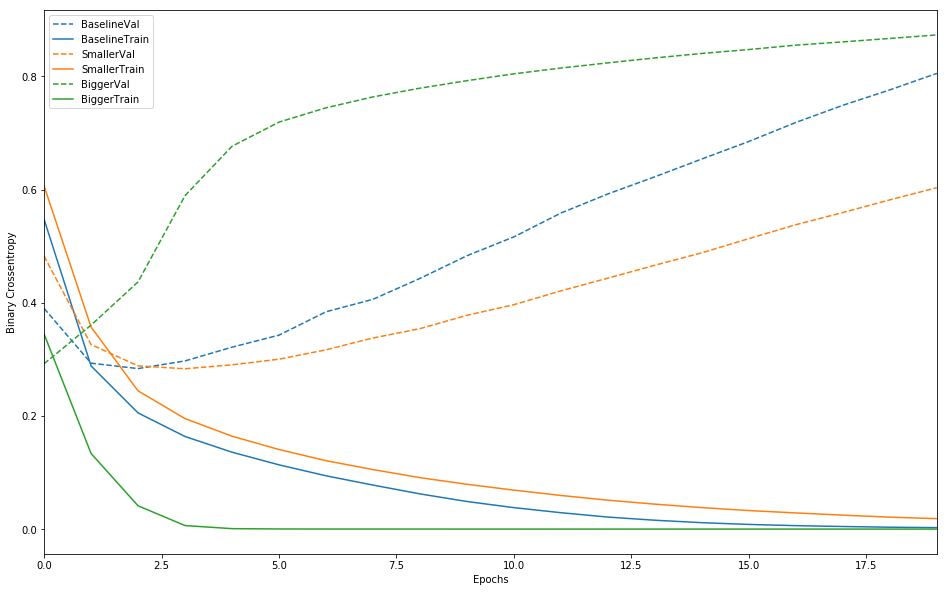

In [17]:
#Plot training and validation loss
def plot_history(histories,key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name,history in histories:
        val=plt.plot(history.epoch,history.history['val_' +key],'--',label=name.title()+'Val')
        
        plt.plot(history.epoch,history.history[key],color=val[0].get_color(),label=name.title()+'Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

plot_history([('baseline',baseline_history),
             ('smaller',small_history),
             ('bigger',bigger_history)])

In [18]:
l2_model=keras.models.Sequential([keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),
                                 activation=tf.nn.relu,input_shape=(num_words,)),
                                                     keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu),
                        keras.layers.Dense(1, activation=tf.nn.sigmoid)
                             ])

In [19]:
l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.5344 - acc: 0.8018 - binary_crossentropy: 0.4947 - val_loss: 0.3828 - val_acc: 0.8752 - val_binary_crossentropy: 0.3413
Epoch 2/20
 - 2s - loss: 0.3048 - acc: 0.9097 - binary_crossentropy: 0.2592 - val_loss: 0.3344 - val_acc: 0.8879 - val_binary_crossentropy: 0.2858
Epoch 3/20
 - 2s - loss: 0.2543 - acc: 0.9279 - binary_crossentropy: 0.2034 - val_loss: 0.3361 - val_acc: 0.8858 - val_binary_crossentropy: 0.2834
Epoch 4/20
 - 2s - loss: 0.2298 - acc: 0.9399 - binary_crossentropy: 0.1756 - val_loss: 0.3470 - val_acc: 0.8839 - val_binary_crossentropy: 0.2918
Epoch 5/20
 - 2s - loss: 0.2168 - acc: 0.9456 - binary_crossentropy: 0.1601 - val_loss: 0.3597 - val_acc: 0.8802 - val_binary_crossentropy: 0.3022
Epoch 6/20
 - 2s - loss: 0.2039 - acc: 0.9508 - binary_crossentropy: 0.1457 - val_loss: 0.3731 - val_acc: 0.8768 - val_binary_crossentropy: 0.3146
Epoch 7/20
 - 2s - loss: 0.1971 - acc: 0.9534 - binary_crossentropy:

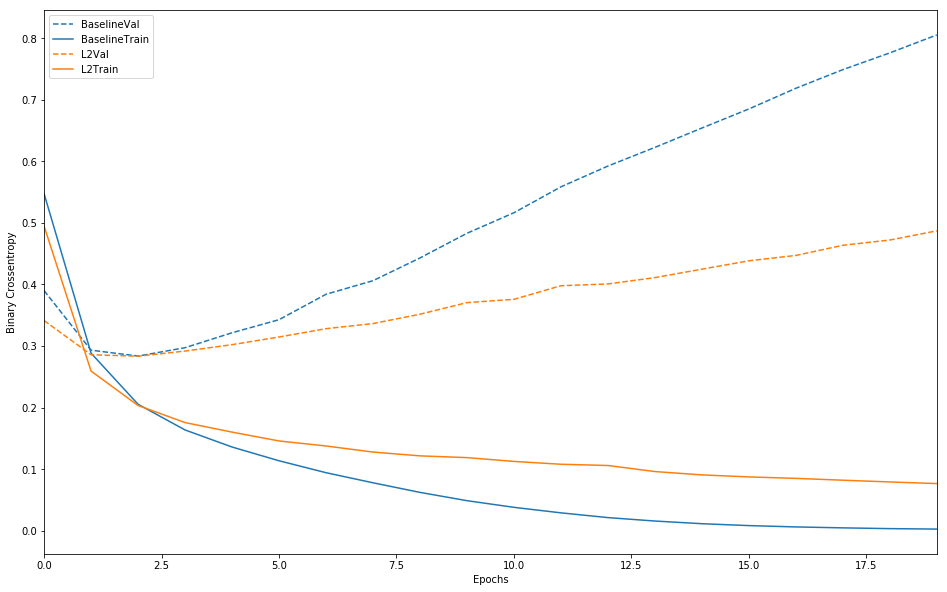

In [20]:
plot_history([('baseline',baseline_history),
             ('l2',l2_model_history)])